# Two-Level: Sech Pulse 6π — Pulse Breakup

Time taken to solve this problem on a 2013 MacBook Pro:
**13min 59s**

## Define the Problem

First we need to define a sech pulse with the area we want. We'll fix the width of the pulse and the area to find the right amplitude.

The full-width at half maximum (FWHM) $t_s$ of the sech pulse is related to the FWHM of a Gaussian by a factor of $1/2.6339157938$. (See §3.2.2 of my [PhD thesis](https://github.com/tommyogden/phd-thesis)).

We then obtain the amplitude $a$ we need from

$$
a = \frac{n}{2 \pi ~ t_s}
$$

In [1]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 1.0*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 6.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

t_width 0.3796628587572578
ampl 2.5152043096265


In [2]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 2.5152043096265,
        "rabi_freq_t_args": {
          "ampl": 1.0,
          "centre": 0.0,
          "width": 0.3796628587572578
        },
        "rabi_freq_t_func": "sech"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 1200,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [
    10.0
  ],
  "velocity_classes": {},
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-sech-6pi"
}
"""

In [3]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

We'll just check that the pulse area is what we want.

In [4]:
print('The input pulse area is {0}'.format(np.trapz(mb_solve_00.Omegas_zt[0,0,:].real, 
                                                    mb_solve_00.tlist)/np.pi))

The input pulse area is 5.980309241676102


## Solve the Problem

In [5]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(step='ab', recalc=False)

Loaded tuple object.
CPU times: user 16.1 ms, sys: 38.6 ms, total: 54.7 ms
Wall time: 61.3 ms


## Plot Output

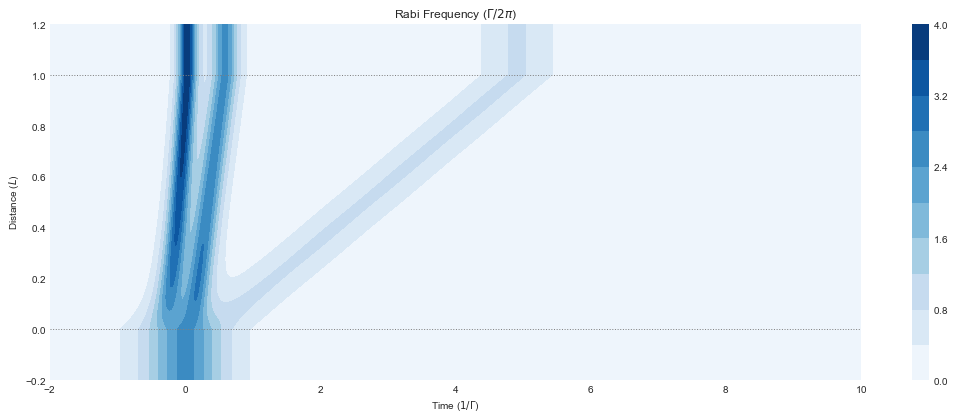

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 4.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/mb-solve-two-sech-6pi.png')

Text(0,0.5,'Pulse Area ($\\pi$)')

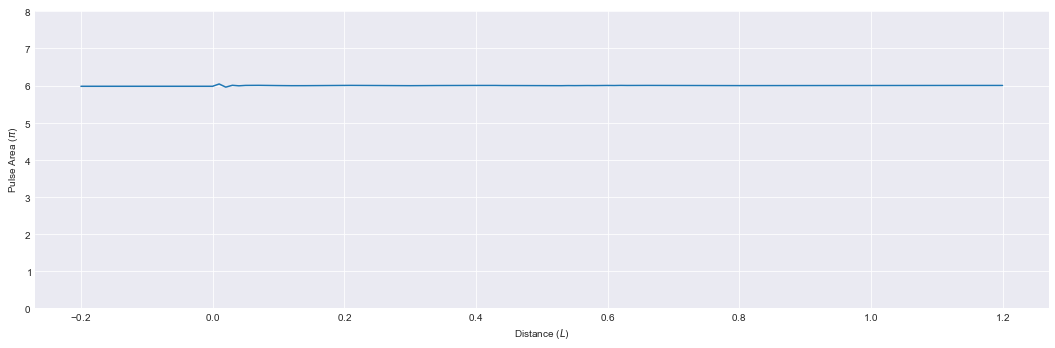

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi, clip_on=False)
ax.set_ylim([0.0, 8.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)')

## Analysis

The $6 \pi$ sech pulse breaks up into three $2 \pi$ pulses, which travel at a speed according to their width.